In [1]:
import torch
import numpy as np
import os
import sys

src_path = os.path.abspath(os.path.join("src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

print(sys.path)

['/nethome/abhalerao9/TIMESERIESMODELING/TSFMProject/src', '/nethome/abhalerao9/anaconda3/envs/timesfm/lib/python311.zip', '/nethome/abhalerao9/anaconda3/envs/timesfm/lib/python3.11', '/nethome/abhalerao9/anaconda3/envs/timesfm/lib/python3.11/lib-dynload', '', '/nethome/abhalerao9/anaconda3/envs/timesfm/lib/python3.11/site-packages']


In [2]:
from tsfmproject.model import ChronosModel
from tsfmproject.dataset import ChronosDataset
from tsfmproject.visualization import ForecastVisualization

/nethome/abhalerao9/anaconda3/envs/timesfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train_dataset = ChronosDataset(name="ett", mode="train", path='/nethome/sli999/TSFMProject/src/tsfmproject/models/moment/data/ETTh1.csv', datetime_col='date', freq='h', context_len=128, horizon_len=64)
test_dataset = ChronosDataset(name="ett", mode="test", path='/nethome/sli999/TSFMProject/src/tsfmproject/models/moment/data/ETTh1.csv', datetime_col='date', freq='h', context_len=128, horizon_len=64)

print(len(test_dataset.dataset))
# print(test_dataset.dataset.shape)

52


In [4]:
repo = "amazon/chronos-t5-small"
ch = ChronosModel(config=None, repo=repo)
ch.load_model()


In [5]:
eval_results, trues, preds, histories = ch.evaluate(test_dataset, batch_size=8, metrics=["MSE", "MASE"])
print(eval_results)
# visualization = ForecastVisualization(trues, preds[:,:,1,:], histories)
# visualization.plot()

{'MSE': 0.6317291, 'MASE': 1.7217156}


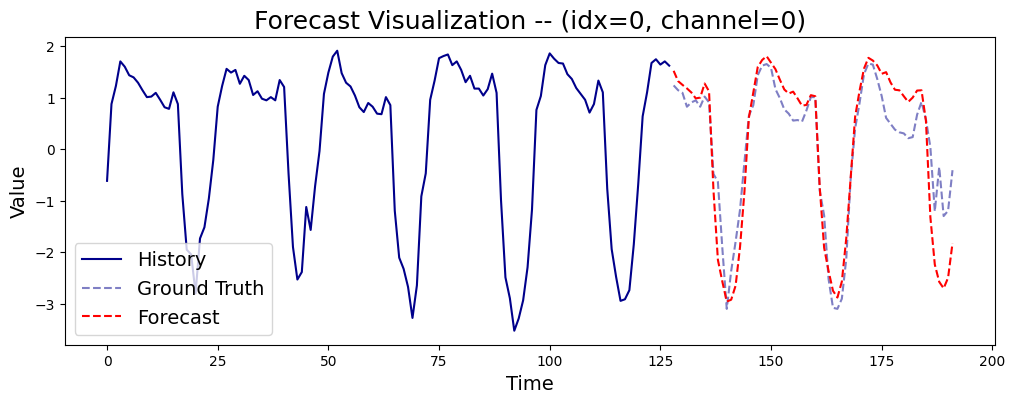

In [6]:
visualization = ForecastVisualization(trues, preds[:,:,:], histories)
visualization.plot(channel_idx=0, time_index=0)

In [7]:
ch.finetune(train_dataset)


The speedups for torchdynamo mostly come wih GPU Ampere or higher and which is not detected here.
max_steps is given, it will override any value given in num_train_epochs
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
/nethome/abhalerao9/anaconda3/envs/timesfm/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss
5,4.672300
10,4.600300
15,4.531500
20,4.542900
25,4.486700
30,4.480400
35,4.460000
40,4.450800
45,4.438400
50,4.429300


/nethome/abhalerao9/anaconda3/envs/timesfm/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/nethome/abhalerao9/anaconda3/envs/timesfm/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/nethome/abhalerao9/anaconda3/envs/timesfm/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


In [8]:
latest_run_dir = ch.get_latest_run_dir()
model_dir = os.path.join(latest_run_dir, "checkpoint-final")
model_type = "seq2seq"
model = ch.load_model(model_dir, model_type)

INFO:results_logger:Model loaded from /nethome/abhalerao9/TIMESERIESMODELING/TSFMProject/src/./tsfmproject/models/chronosforecasting/output/finetuning/run-11/checkpoint-final


In [9]:
eval_results, trues, preds, histories = ch.evaluate(test_dataset, batch_size=8, metrics=["MSE", "MASE"])
print(eval_results)

{'MSE': 0.5772213, 'MASE': 1.6072242}


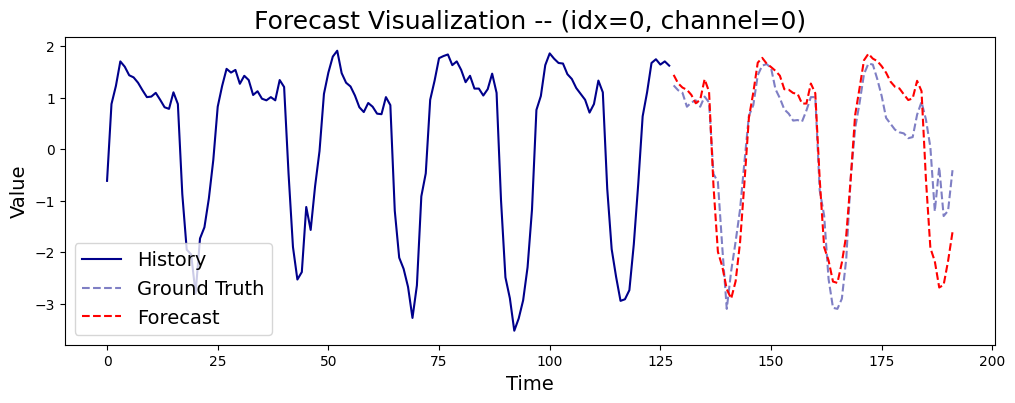

In [10]:
visualization = ForecastVisualization(trues, preds[:,:,:], histories)
visualization.plot(channel_idx=0, time_index=0)

In [8]:
import torch
torch.cuda.empty_cache()